In [1]:
import pandas as pd

In [2]:
#read csv file
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')

#display first 5 rows
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

#display first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
#check shape of data frame
data.shape

(200, 4)

In [7]:
#import seaborn
import seaborn as sns

#allow plots to appear within the notebook
%matplotlib inline

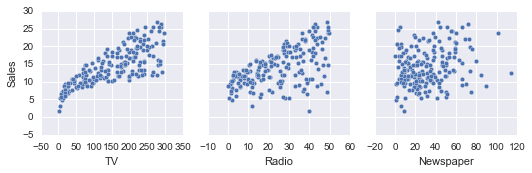

In [9]:
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(data,x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales')

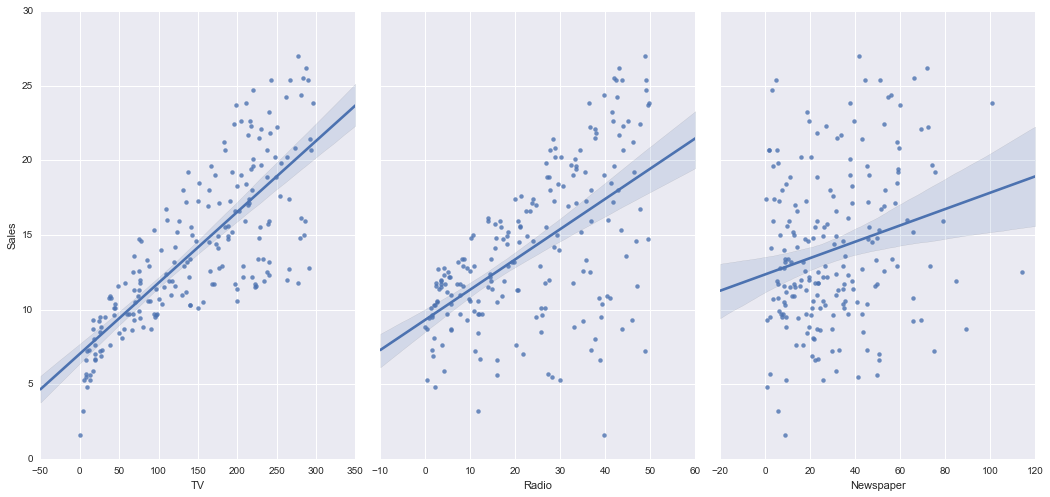

In [11]:
#make things more readable
sns.pairplot(data,x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 7, aspect = 0.7, kind = 'reg')

In [12]:
#create a python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

#use the list to select a subset of the original dataframe
x = data[feature_cols]

#print first 5 rows
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [13]:
#view type and shape of x
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [14]:
#select series from the dataframe or y = data.Sales
y = data['Sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [15]:
#check type and shape of y
print(type(y))
print(x.shape)

<class 'pandas.core.series.Series'>
(200, 3)


In [16]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [17]:
#default split is 75% for training and 25% for testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#fit model to the training data(learn the coefficients)
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [20]:
#pair feature names with the coefficients
zip(feature_cols, linreg.coef_)

In [21]:
#make predictions on the testing set
y_pred = linreg.predict(x_test)

## Model Evaluation Metrics for Regression

### **1. Mean Absolute Error:** mean of absolute value of the errors

In [23]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

#calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

#calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


### **2. Mean Squared Error:** mean of the squared errors
(punishes larger errors)

In [24]:
#calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2) / 4.)

#calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


### **3. Root Mean Squared Error:** square root of the mean of the squared errors
(interpretable in the 'y' units)

In [25]:
#calculate RMSE by hand
import numpy as np
print((np.sqrt((10**2 + 0**2 + 20**2 + 10**2) / 4)))

#calculate RMSE using scikit-learn
print((np.sqrt(metrics.mean_squared_error(true, pred))))

12.2474487139
12.2474487139


In [26]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [27]:
#remove newspaper from model and check RMSE

#create list of feature names
feature_cols = ['TV', 'Radio']

#use the list to select a subset of the original dataframe
x = data[feature_cols]

#select a series from the dataframe
y = data.Sales

#split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

#fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)

#make predictions on the testing set
y_pred = linreg.predict(x_test)

#compute the RMSE of predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The RMSE decreased when Newspaper was removed from the model. Thus, it is unlikely this feature is useful for predicting sales and is removed from the model.